# AVANCE II  PROYECTO INTEGRADOR

### Grupo: 001, Lunes-Miércoles-Viernes/6:00pm-7:00pm
### Equipo 7
    - Josias de la Cruz Cruz               1750176
    - Carlos Abraham Murillo Valdés        1488911
    - Luisa Rubí Villegas Rincón           1752574

## Base de datos: Novel Corona Virus 2019 Dataset

### Descripción de la base de datos
La base de datos con la que se va a estar trabajando contiene información general a nivel mundial acerca del virus COVID-19.
Trabajaremos en esta base de datos con el objetivo de determinar distintas probabilidades que puede generar este virus.

In [13]:
%matplotlib inline
import pandas as pd
import numpy as np
import pandas_profiling
import seaborn as sns
import matplotlib.pyplot as plt

### Descripción de las columnas.

    ● Sno - Número de serie
    ● Date - Fecha y hora de la observación en MM / DD / AAAA HH: MM: SS.
    ● Province / State - Provincia o estado de la observación (podría estar vacío cuando falta).
    ● Country - País de observación.
    ● Last Update - Hora en UTC en la que se actualiza la fila para la provincia o país en cuestión.
    ● Confirmed - Número de casos confirmados.
    ● Deaths - Número de muertes.
    ● Recovered - Número de casos recuperados.    

A continuación visualizaremos los primeros 10 elementos de nuestra base de datos (la base de datos contiene miles de elementos). 

In [14]:
covid= pd.read_csv("covid_19_data.csv") 
covid.head(10)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
5,6,01/22/2020,Guangdong,Mainland China,1/22/2020 17:00,26.0,0.0,0.0
6,7,01/22/2020,Guangxi,Mainland China,1/22/2020 17:00,2.0,0.0,0.0
7,8,01/22/2020,Guizhou,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
8,9,01/22/2020,Hainan,Mainland China,1/22/2020 17:00,4.0,0.0,0.0
9,10,01/22/2020,Hebei,Mainland China,1/22/2020 17:00,1.0,0.0,0.0


Mostramos los tipos de datos que maneja cada una de nuestras variables

In [15]:
covid.dtypes

SNo                  int64
ObservationDate     object
Province/State      object
Country/Region      object
Last Update         object
Confirmed          float64
Deaths             float64
Recovered          float64
dtype: object

Ahora, verificamos si algunas de nustras variables contienen datos nulos. Resultado True: indica que si contiene valores nulos, False: indica que no contiene valores nulos.

In [16]:
covid.isnull().any()

SNo                False
ObservationDate    False
Province/State      True
Country/Region     False
Last Update        False
Confirmed          False
Deaths             False
Recovered          False
dtype: bool

## Justificación de los datos

La principal característica que nos llamó la atención de esta base de datos fue que utiliza datos discretos, lo cual nos fue fácil de entender su significado. Estos datos representan las frecuencias o las incidencias de estado en la que una persona contagiada de coronavirus puede estar. También podemos observar su ubicación geográfica y la hora de registro.

Los principales beneficio de trabajar con datos discretos, es que, nos es sencillo visualizar las frecuencias de los estados posibles de una persona de covid 19, considerándola como nuestra unidad de estudio. Una persona es = 1 no es posible que una persona valga ½. Bajo esa premisa trabajaremos en este proyecto.


### Preguntas de interés

Nuestras preguntas concretas son las que se mencionan a continuación, pero a lo largo del proyecto existe la posibilidad de poder agregar más.

##### ¿Cual es la probabilidad de contagio, muerte y recuperación de cierta área geográfica?

##### ¿Cuáles son los pesos de las probabilidades de que presenten ciertos conjuntos de estados a la vez?.

## Limpieza de datos

En nuestro caso la base de datos no tendrá modificación alguna en cuanto a eliminar variables innecesarias, ya que las varibles que contiene sirven para realizar los procedimientos que se realizarán más adelante. El cambio será unicamente en el nombre de las variables ya que se renombrarán.

In [17]:
covid.rename(columns = {'ObservationDate':'Dia Observado', 'Province/State':'Ciudad/Estado', 'Country/Region':'País/Región', 'Last Update':'ÚltimaActualización', 'Confirmed':'Confirmados', 'Deaths':'Fallecidos', 'Recovered':'Recuperados'})

,SNo,Dia Observado,Ciudad/Estado,País/Región,ÚltimaActualización,Confirmados,Fallecidos,Recuperados
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
17367,17368,04/21/2020,Wyoming,US,2020-04-21 23:39:09,443.0,2.0,0.0
17368,17369,04/21/2020,Xinjiang,Mainland China,2020-04-21 23:39:09,76.0,3.0,73.0
17369,17370,04/21/2020,Yukon,Canada,2020-04-21 23:39:09,11.0,0.0,0.0
17370,17371,04/21/2020,Yunnan,Mainland China,2020-04-21 23:39:09,184.0,2.0,178.0


## Estadística de los datos

Empezaremos a trabajar con nuestros datos de manera que podamos responder las preguntas que nos hemos planteado anteriormente, el enfoque de este proyecto será de tipo predictivo.

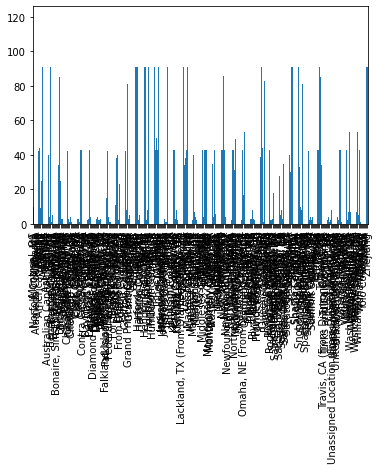

In [20]:
covid['Province/State'].value_counts().sort_index().plot.bar()